# Cohort Analysis on Online Retail Dataset

__Cohort Analysis is a kind of behaviorial anaylytics that breaks the the data into a related groups before analysis. These group or cohorts usually share common traits or action within a defined time-span.__ <br>

There are mainly 2 different types of Cohort Analysis:
> 1. Time Cohort
> 2. Behavior Cohort

We are going to perform time cohort for this analysis. Here we will divide the customers depending on the month of their 1st transaction. Index will define each purchase of the customer which will represent the number of months since first transaction. 

<b>Intent:</b>
> 1. Customer Segmentation
> 2. Retention Rate


Lets start with Customer Segmentation first

In [6]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import os
import missingno as msno
from textwrap import wrap

In [7]:
#Setting up the Path to the directory using OS Library

os.chdir('C:\\Users\\Dell\\OneDrive\Desktop\\CLTV project')

In [8]:
# Importing the Dataset

retail_data = pd.read_excel("Online Retail.xlsx")

In [9]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Checking for missing values

<AxesSubplot:>

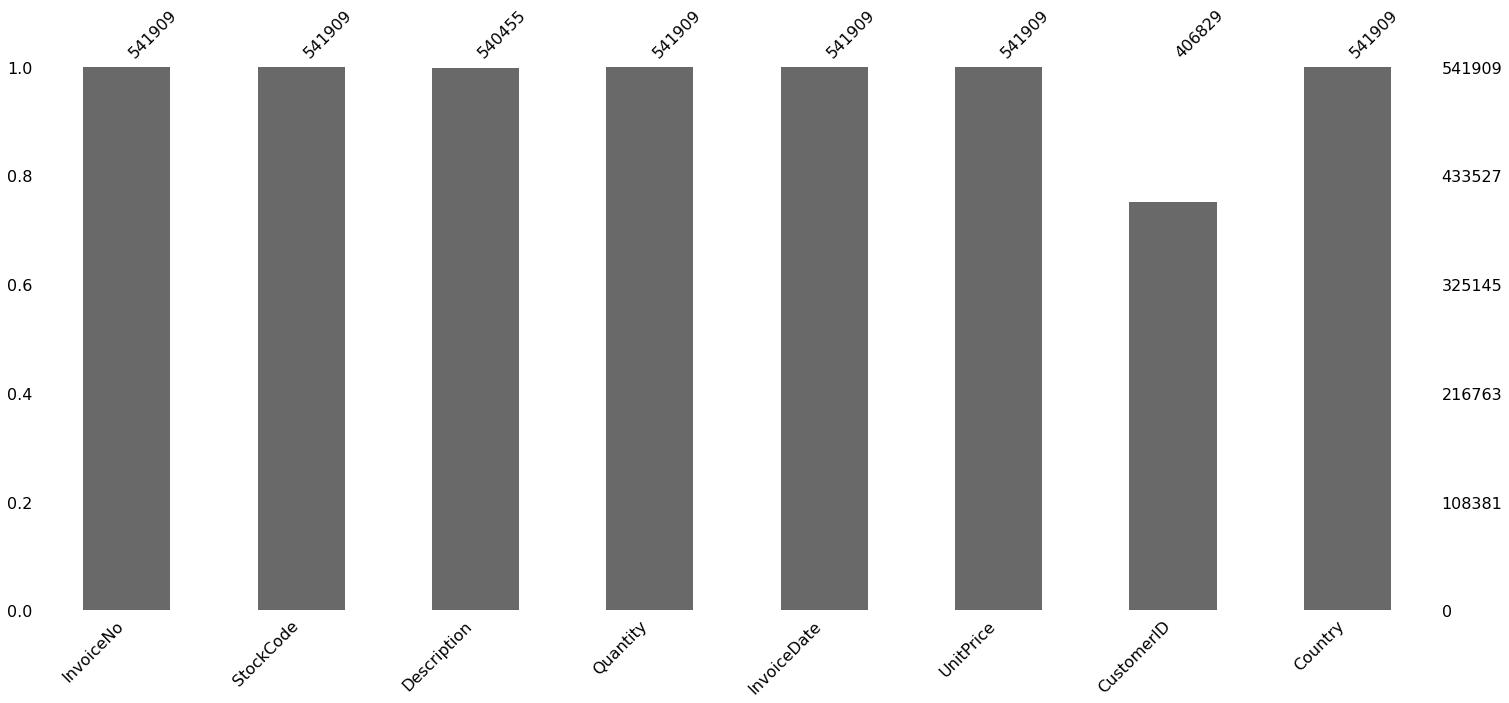

In [10]:
msno.bar(retail_data)

We noticed most of the transactions were done for United Kingdom so decided to filter the data based on the country. And moving forward, would be analysing just for the transactions done in United Kingdom

In [11]:
filtered_data = retail_data[['Country', 'CustomerID']].drop_duplicates()

<AxesSubplot:>

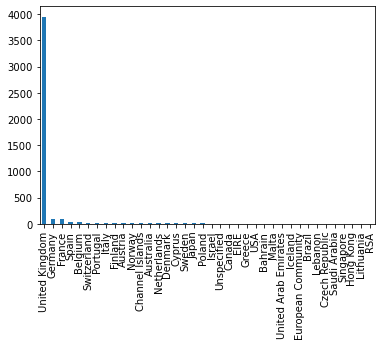

In [12]:
filtered_data.Country.value_counts().plot(kind='bar')

In [13]:
UK_data = retail_data[retail_data.Country == 'United Kingdom']

In [14]:
UK_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [15]:
UK_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
UK_data = UK_data[UK_data.Quantity > 0]

We observed that customerID's are missing and there was no option to get missing data. So to move forward we are dropping the rows with missing values

In [17]:
UK_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    486286 non-null  object        
 1   StockCode    486286 non-null  object        
 2   Description  485694 non-null  object        
 3   Quantity     486286 non-null  int64         
 4   InvoiceDate  486286 non-null  datetime64[ns]
 5   UnitPrice    486286 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      486286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.4+ MB


<AxesSubplot:>

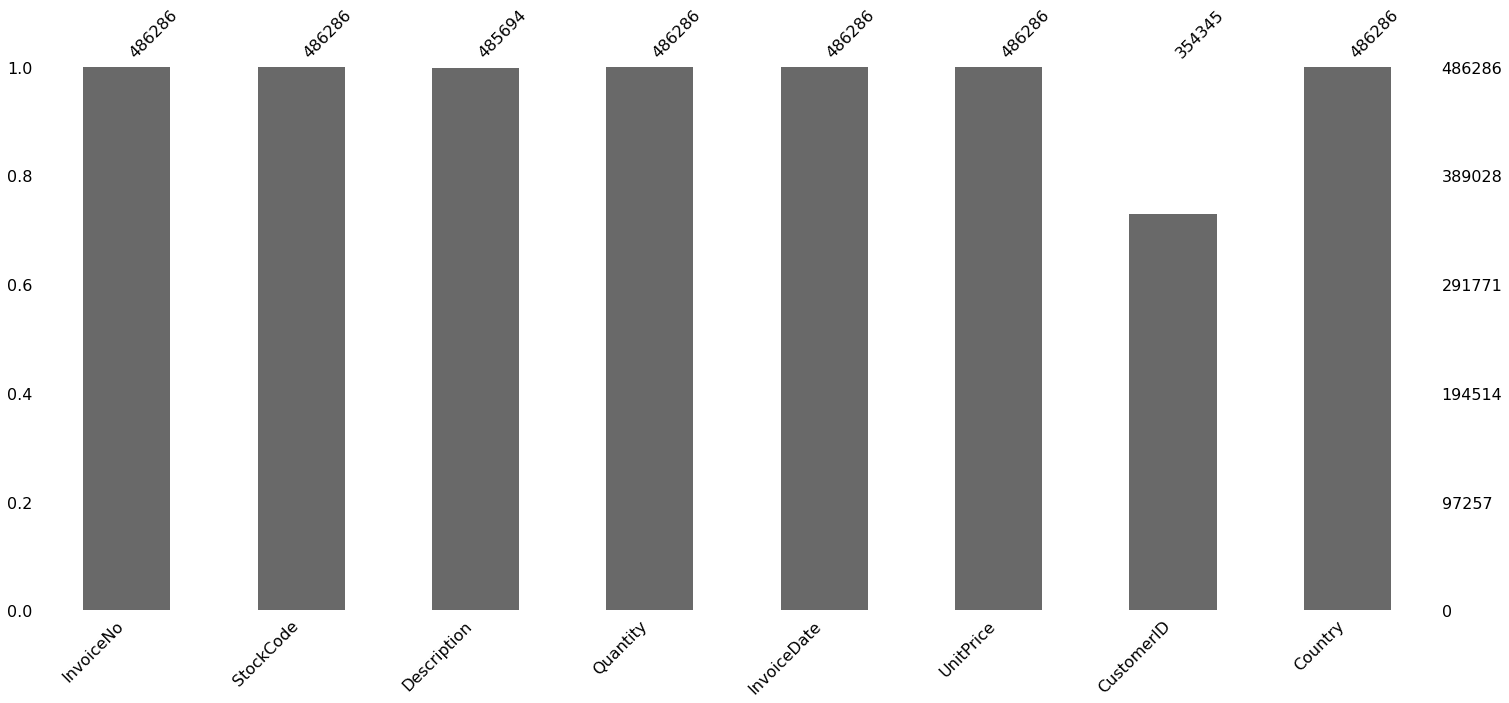

In [18]:
msno.bar(UK_data)

In [19]:
print(UK_data.isnull().values.sum())

132533


In [20]:
# Droping the Missing Values

UK_data_filtered = UK_data.dropna(subset=['CustomerID'])

<AxesSubplot:>

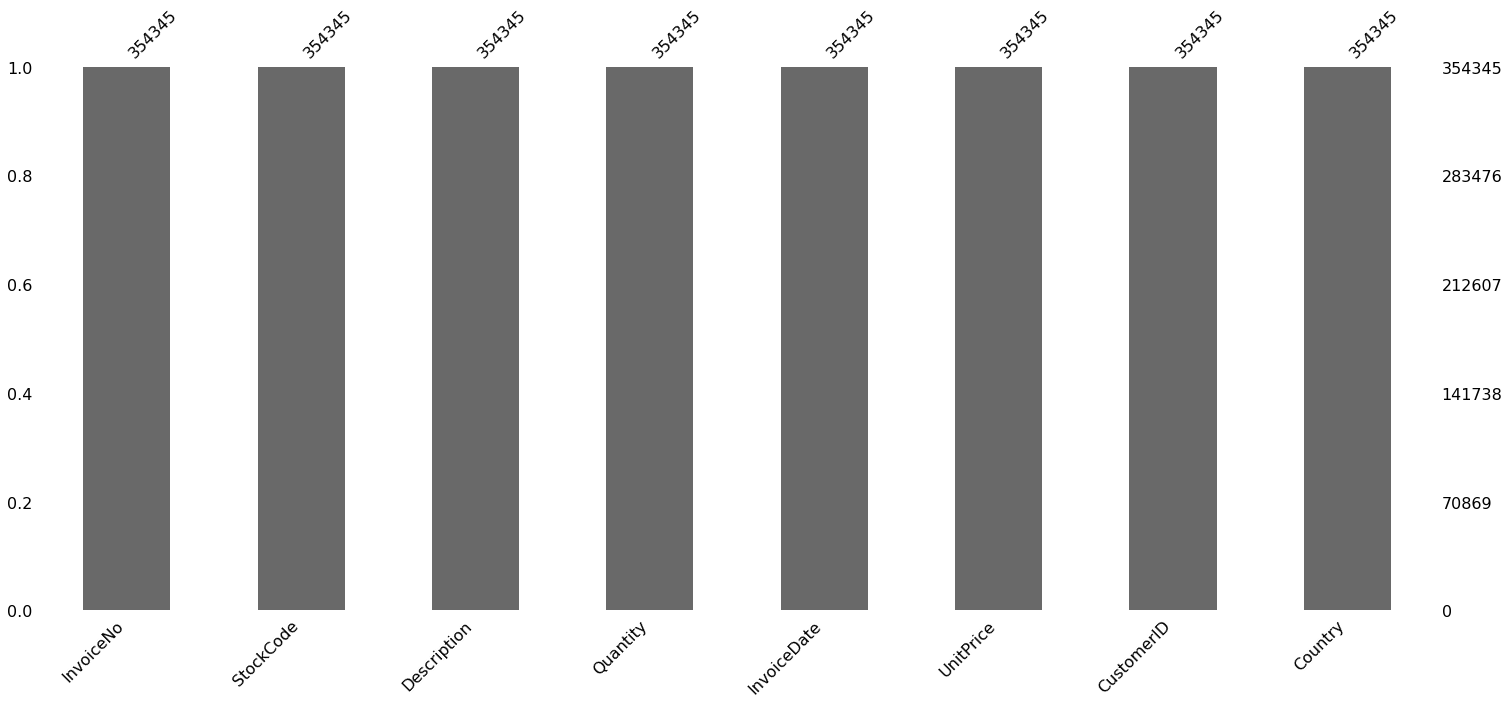

In [21]:
msno.bar(UK_data_filtered)

In [22]:
# Creating a funtion to get the day 1 of each month.
def get_month(x): return dt.datetime(x.year,x.month,1)

In [23]:
#No creating the InvoiceDate column based on the month and storing it as InvoiceMonth
UK_data_filtered['InvoiceMonth']= UK_data_filtered['InvoiceDate'].apply(get_month)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4408\2830114167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_data_filtered['InvoiceMonth']= UK_data_filtered['InvoiceDate'].apply(get_month)


In [24]:
UK_data_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


### Creating group object with traget column (here CustomerID)

In [25]:
# Grouping by CustomerID and selecting InvoiceMonth Value
grouping = UK_data_filtered.groupby('CustomerID')['InvoiceMonth']

In [26]:
grouping.head()

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
538813   2011-12-01
538814   2011-12-01
538815   2011-12-01
538816   2011-12-01
540421   2011-12-01
Name: InvoiceMonth, Length: 19024, dtype: datetime64[ns]

### Finding the Aquisition Month

Assigning Cohort Month to each customer using the MIN function on the grouping we created earlier. 

In [27]:
UK_data_filtered['CohortMonth']=grouping.transform('min')

C:\Users\Dell\AppData\Local\Temp\ipykernel_4408\3608874344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_data_filtered['CohortMonth']=grouping.transform('min')


In [28]:
UK_data_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [29]:
#Calculating time offset in Month as Cohort Index
def get_date_int(df,column):
    year = df[column].dt.year
    month= df[column].dt.month
    day= df[column].dt.day
    return year,month,day

In [30]:
# Getting interger of date part from InvoiceMonth Column
Invoice_year,Invoice_month,_=get_date_int(UK_data_filtered,'InvoiceMonth')

In [31]:
# Getting integer for date part from CohortMonth Cloumn
Cohort_year, Cohort_month,_ = get_date_int(UK_data_filtered,'CohortMonth')

In [32]:
# Now we will calculate the different between the invoicedate and the cohort date in years and months separately. 
years_diff = Invoice_year - Cohort_year

month_diff = Invoice_month - Cohort_month

Now we are calculating the Cohort Index and to do so we are going to add +1 at the end so that first month is marked as 1 instead of 0 <br>
__Result will be the cohort index: in terms of the number of months and call the column 'CohortIndex'__ 

In [33]:
UK_data_filtered['CohortIndex'] = years_diff * 12 + month_diff + 1

C:\Users\Dell\AppData\Local\Temp\ipykernel_4408\1730834677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_data_filtered['CohortIndex'] = years_diff * 12 + month_diff + 1


In [34]:
UK_data_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [35]:
grouping = UK_data_filtered.groupby(['CohortMonth', 'CohortIndex'])

Counting the number of customers in each group using Pandas nunique function

In [36]:
Cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

In [37]:
Cohort_data.head()


CohortMonth  CohortIndex
2010-12-01   1              815
             2              289
             3              263
             4              304
             5              293
Name: CustomerID, dtype: int64

Reseting the index and creating the Pivot setting index as CohortMonth, columns as CohortIndex and Values as CustomerID (counts)<br>
__This will return the table that will serve as the base for calculating the retention rate__

<div class="alert alert-block alert-warning">
<b>Rentention Rate:</b>
Retention rate is an important metric that calculates the percentage of users who continue using your product or service over a given time period.
    </div>

In [38]:
Cohort_data = Cohort_data.reset_index()

In [39]:
Cohort_data.head()


,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,815
1,2010-12-01,2,289
2,2010-12-01,3,263
3,2010-12-01,4,304
4,2010-12-01,5,293


In [40]:
Cohort_counts = Cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values= 'CustomerID')

In [41]:
Cohort_counts.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,815.0,289.0,263.0,304.0,293.0,323.0,291.0,278.0,289.0,325.0,299.0,405.0,218.0
2011-01-01,358.0,76.0,93.0,84.0,119.0,99.0,90.0,87.0,108.0,117.0,127.0,43.0,NaN
2011-02-01,340.0,64.0,66.0,97.0,98.0,86.0,87.0,96.0,90.0,104.0,25.0,NaN,NaN
2011-03-01,419.0,64.0,109.0,83.0,94.0,69.0,111.0,96.0,119.0,38.0,NaN,NaN,NaN
2011-04-01,277.0,58.0,56.0,60.0,56.0,61.0,61.0,73.0,20.0,NaN,NaN,NaN,NaN


In [42]:
Cohort_sizes = Cohort_counts.iloc[:,0]

In [43]:
Cohort_sizes.head()

CohortMonth
2010-12-01    815.0
2011-01-01    358.0
2011-02-01    340.0
2011-03-01    419.0
2011-04-01    277.0
Name: 1, dtype: float64

In [44]:
retention = Cohort_counts.divide(Cohort_sizes, axis=0)

In [45]:
retention.head()


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.354601,0.322699,0.373006,0.359509,0.396319,0.357055,0.341104,0.354601,0.398773,0.366871,0.496933,0.267485
2011-01-01,1.0,0.212291,0.259777,0.234637,0.332402,0.276536,0.251397,0.243017,0.301676,0.326816,0.354749,0.120112,NaN
2011-02-01,1.0,0.188235,0.194118,0.285294,0.288235,0.252941,0.255882,0.282353,0.264706,0.305882,0.073529,NaN,NaN
2011-03-01,1.0,0.152745,0.260143,0.198091,0.224344,0.164678,0.264916,0.229117,0.284010,0.090692,NaN,NaN,NaN
2011-04-01,1.0,0.209386,0.202166,0.216606,0.202166,0.220217,0.220217,0.263538,0.072202,NaN,NaN,NaN,NaN


In [46]:
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,35.5,32.3,37.3,36.0,39.6,35.7,34.1,35.5,39.9,36.7,49.7,26.7
2011-01-01,100.0,21.2,26.0,23.5,33.2,27.7,25.1,24.3,30.2,32.7,35.5,12.0,NaN
2011-02-01,100.0,18.8,19.4,28.5,28.8,25.3,25.6,28.2,26.5,30.6,7.4,NaN,NaN
2011-03-01,100.0,15.3,26.0,19.8,22.4,16.5,26.5,22.9,28.4,9.1,NaN,NaN,NaN
2011-04-01,100.0,20.9,20.2,21.7,20.2,22.0,22.0,26.4,7.2,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.8,17.2,17.2,20.7,22.7,26.6,9.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.8,14.5,23.8,23.8,32.2,9.8,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,17.8,19.5,23.1,27.8,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,22.7,22.7,24.1,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
retention.index = retention.index.strftime('%y-%m')

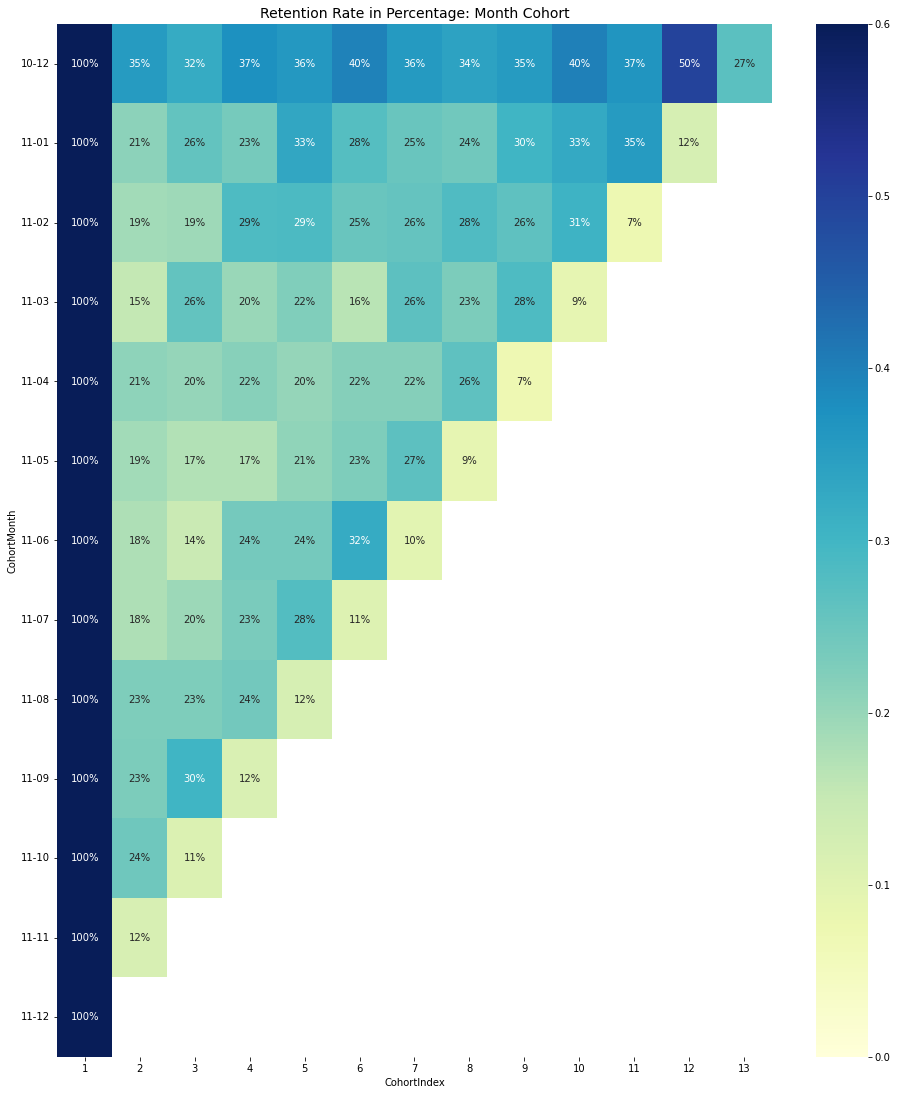

In [48]:
#Visual representation
plt.figure(figsize=(16,19))
plt.title('Retention Rate in Percentage: Month Cohort', fontsize =14)
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('CohortMonth')
plt.xlabel('CohortIndex')
plt.yticks( rotation='360')
plt.show()

In [49]:
file_name = 'Retentionrate.xlsx'
retention.to_excel(file_name)

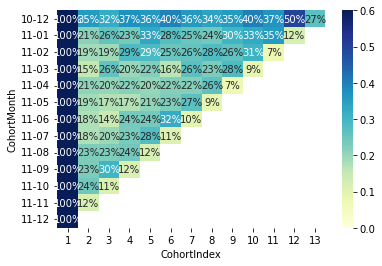

In [50]:
retention_map = sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
retention_map.figure.savefig("retention_map_retail.pdf")